# By: Abdulkodri Mubarak Damilola
#SPARKS FOUNDATION INTERNSHIP:  Data Science And Business Analytics Intern
#TASK1:Prediction Using Supervised Learnings (Student score prediction)

This is a regression task, which I will be predicting percentage of marks that a student is expected to score based on the number of our studied.This is a simple Linear Regression task as its involve two variable.


In [33]:
#import the require library
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn import metrics
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [34]:
#Importing the datasets from remote link
Url="http://bit.ly/w-data"
df_data=pd.read_csv(Url)
df_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [35]:
#Data Explanatory
df_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [36]:
df_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [37]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [38]:
df_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [39]:
df_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

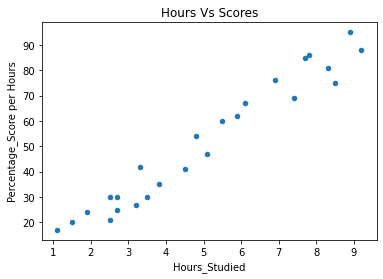

In [40]:
#Plotting the distribution of Score
df_data.plot(kind="scatter",x="Hours",y="Scores")
plt.title("Hours Vs Scores")
plt.xlabel("Hours_Studied")
plt.ylabel("Percentage_Score per Hours")
plt.show()

In [59]:
#Dividing the Data into Attribute and Label
X=df_data.iloc[:,:-1].values
y=df_data.iloc[:,1].values
#printing the shape
print(X.shape)
print(y.shape)

(25, 1)
(25,)


In [76]:
#Split the data into train and test using scikit_learn in built function
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#fitting the train and split data into the Algorithm
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

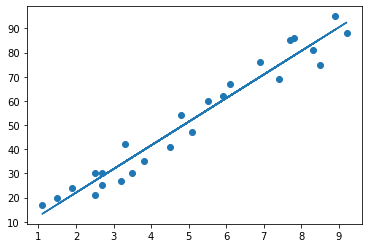

In [87]:
#Plotting the Regression Line
Line=model.coef_*X+model.intercept_
#Plotting for the test data
plt.scatter(X,y)
plt.plot(X,Line)
plt.show()

In [88]:
#Making prediction
# print(y_test)
y_pred=model.predict(X)
y_pred

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

In [89]:
#Comparing Actual vs predicted score
df=pd.DataFrame({"Actual":y,"Predicted":y_pred})
df


,Actual,Predicted
0,21,26.923182
1,47,52.340271
2,27,33.766244
3,75,85.578002
4,30,36.698985
5,20,17.147378
6,88,92.421065
7,60,56.250592
8,81,83.622842
9,25,28.878343


In [90]:
#prediciting the percentage score for 9.25hours studied 
x_new=pd.DataFrame({"Hours":[9.25]})
x_new

,Hours
0,9.25


In [91]:
#predicting the new study hour
New_predict=model.predict(x_new)
New_predict

array([92.90985477])

In [92]:
#Evaluating the model
print(sqrt(mean_squared_error(y,y_pred)))

5.374265578592619


In [99]:
#import OLS for estimating unknow parameter in LR and relationship between the variables
import statsmodels.formula.api as smf
model=smf.ols(formula="Scores~Hours",data=df_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           9.13e-17
Time:                        15:18:15   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.3